# 1. Perkenalan

- Nama        : Sanggeni Gali Wardhana
- Batch       : FTDS-011
- Dataset     : E_Commerce_Dataset
- Objective   : Customer Churn Prediction

**Milestone 2**

Pada data ini terdapat data Customer dengan berbagai data demografi, kegiatan terakhir customer saat membeli barang di aplikasi e-commerce, jumlah berapa kali order, dan sebagainya. Data ini akan digunakan untuk memprediksi kemungkinan churn dari customer sehingga dapat ditemukan solusi untuk menghindari churn dari customer tersebut. Data yang tersedia pada dataset ini adalah : 


1.	CustomerID	: Unique customer ID
2.	Churn : Churn Flag
3.	Tenure :	Tenure of customer in organization
4.	PreferredLoginDevice : Preferred login device of customer
5.	CityTier : City tier
6.	WarehouseToHome : Distance in between warehouse to home of customer
7.	PreferredPaymentMode : Preferred payment method of customer
8.	Gender : Gender of customer
9.	HourSpendOnApp : Number of hours spend on mobile application or...
10.	NumberOfDeviceRegistered : Total number of deceives is registered on part...
11.	PreferedOrderCat : Preferred order category of customer in last m...
12.	SatisfactionScore : Satisfactory score of customer on service
13.	MaritalStatus : Marital status of customer
14.	NumberOfAddress : Total number of added added on particular cust...
15.	Complain : Any complaint has been raised in last month
16.	OrderAmountHikeFromlastYear : Percentage increases in order from last year
17.	CouponUsed : Total number of coupon has been used in last m...
18.	OrderCount : Total number of orders has been places in last...
19.	DaySinceLastOrder : Day Since last order by customer
20.	CashbackAmount : Average cashback in last month

Objective yang ditentukan adalah :

- **Menentukan data yang berkorelasi atau mempengaruhi kemungkinan churn dari pelanggan.**
- **Membuat model machine learning menggunakan beberapa algoritma, lalu membandingkan performa beberapa algoritma tersebut dalam memprediksi kemungkinan churn dari pelanggan e-commerce.**

---
# 2. Import Library

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
 
import seaborn as sns 
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

import pickle
import ast

---
# 3. Data Loading

Pada tahapan ini, data yang digunakan adalah dalam format excel yang terdiri dari 2 sheet yaitu Data Dictionary dan Data mengenai customer e-commerce itu sendiri. Tahap pertama adalah melakukan read data menggunakan pandas.

In [2]:
dict = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name = "Data Dict")
data = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name = "E Comm")
pd.set_option('display.max_columns', None)
data.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Tabel diatas adalah tabel data yang digunakan.

In [3]:
dict = dict[['Unnamed: 2','Unnamed: 3']]
dict = dict.rename(columns={'Unnamed: 2':'Feature', 'Unnamed: 3':'Explanation'})
dict

,Feature,Explanation
0,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or...


Tabel diatas adalah dictionary atau penjelasan dari setiap kolom pada data.

In [4]:
data_copy=data.copy()

Setelah itu dilakukan copy data untuk menyimpan data original.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
data.isnull().sum().sum()

1856

Berdasarkan data.info() diatas, terdapat total 20 kolom dengan  5630 row pada setiap kolomnya. Serta ditemukan informasi bahwa terdapat missing value pada beberapa kolom, yang akan dihandle pada tahapan data preprocessing.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


1. terlihat dari persebaran data quartilenya terjadi imbalance pada kolom target (churn).
2. Satisfaction score memiliki sebaran data yang cukup seimbang mulai dari 0 hingga 5, dengan nilai mean 3.07.
3. Jumlah rata-rata order dari keseluruhan customer adalah sebanyak 3 kali setiap satu customer.
4. Customer dari perusahaan e-commerce menghabiskan waktu yang cukup tinggi dengan rata-rata diatas 2.5 jam.

---
# **4. Exploratory Data Analysis (EDA)**

In [8]:
data.head(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07


## Check Customer Churn Column

Churn: 16.838365896980463 %
Retained: 83.16163410301954 %


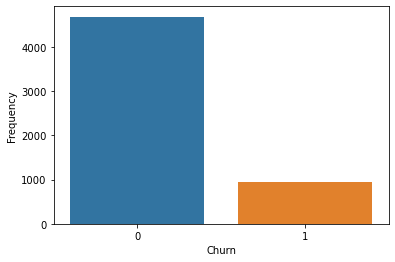

In [9]:
yes=data[data['Churn']==1]["Churn"].count()
no=data[data['Churn']==0]["Churn"].count()
print("Churn:",yes/(yes+no)*100 , "%")
print("Retained:",no/(yes+no)*100 , "%")

cplt =data.groupby(['Churn'])['Churn'].count().reset_index(name='Counts')
sns.barplot(x='Churn', y='Counts',data=cplt)
plt.ylabel("Frequency")
plt.show()

Berdasarkan visualisasi data diatas, dapat terlihat bahwa data customer yang Churn lebih kecil daripada customer yang bertahan. Dengan presentase data sebagai berikut :
- Churn: 16.838365896980463 %
- Retained: 83.16163410301954 %

Karena data imbalance, maka akan dilakukan handling imbalance untuk memperbaiki model dalam mempelajari data.

## Check data kecenderungan customer login menggunakan device apa?

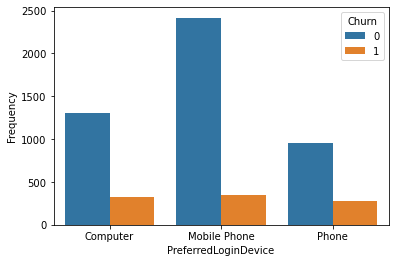

In [10]:
pldv =data.groupby(['PreferredLoginDevice', 'Churn'])['PreferredLoginDevice'].count().reset_index(name='Counts')
sns.barplot(x='PreferredLoginDevice', y='Counts', hue="Churn",data=pldv)
plt.ylabel("Frequency")
plt.show()

**Terlihat bahwa user mobile phone adalah yang terbanyak, dan data ini tidak mempengaruhi churn dari customer.**

## Apakah tier city ada hubungannya dengan customer yg churn?

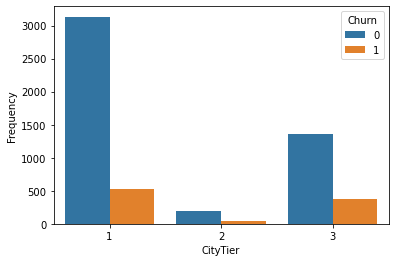

In [11]:
ctc =data.groupby(['CityTier', 'Churn'])['CityTier'].count().reset_index(name='Counts')
sns.barplot(x='CityTier', y='Counts', hue="Churn",data=ctc)
plt.ylabel("Frequency")
plt.show()

- Customer dari e-commerce ini paling banyak terletak pada kota tier 1 dan peringkat terakhir kota tier 2
- Kota tier 1 adalah penyumbang customer churn tertinggi.

## Apakah tipe pembayaran customer mempengaruhi churn?

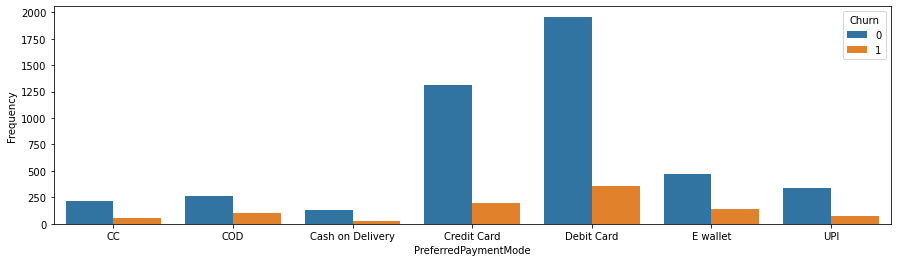

In [12]:
pcrn =data.groupby(['PreferredPaymentMode', 'Churn'])['PreferredPaymentMode'].count().reset_index(name='Counts')
plt.figure(figsize=(15,4))
sns.barplot(x='PreferredPaymentMode', y='Counts', hue="Churn",data=pcrn)
plt.ylabel("Frequency")
plt.show()

- Customer e-commerce ini menggunakan kartu kredit dan debit sebagai alat pembayaran yang paling banyak.
- Akan dilakukan penggabungan untuk kolom Cash on Delivery kedalam COD dan CC kedalam Credit Card

In [13]:
data["PreferredPaymentMode"].replace({"CC": "Credit Card", "Cash on Delivery": "COD" },inplace=True)

Script diatas digunakan untuk merubah CC dan COD pada preferred payment method

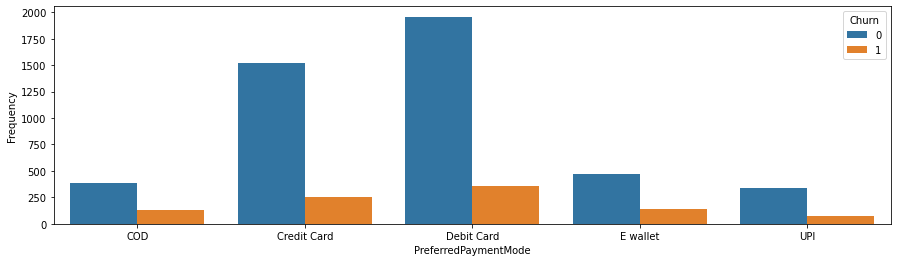

In [14]:
pcrn =data.groupby(['PreferredPaymentMode', 'Churn'])['PreferredPaymentMode'].count().reset_index(name='Counts')
plt.figure(figsize=(15,4))
sns.barplot(x='PreferredPaymentMode', y='Counts', hue="Churn",data=pcrn)
plt.ylabel("Frequency")
plt.show()

string Cash on Delivery dan CC sudah terganti.

## Apakah jarak warehouse ke lokasi customer mempengaruhi churn?

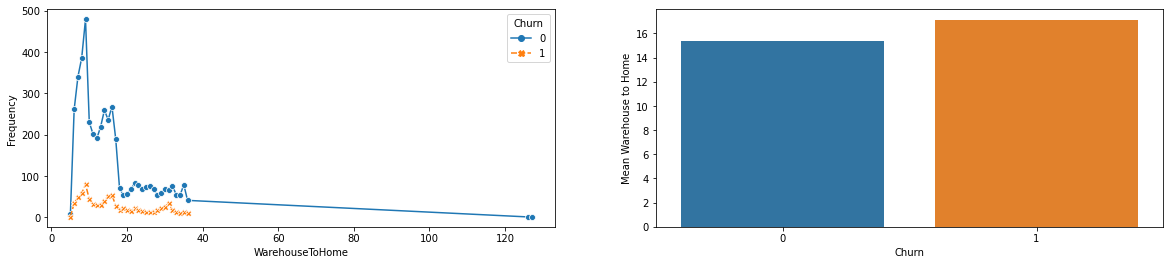

In [15]:
wthc =data.groupby(['WarehouseToHome', 'Churn'])['WarehouseToHome'].count().reset_index(name='Counts')
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.lineplot(x='WarehouseToHome', y='Counts', hue="Churn",data=wthc, style="Churn",markers=True)
plt.ylabel("Frequency")

wthcb =data.groupby(['Churn'])['WarehouseToHome'].mean().reset_index(name='mean')
plt.subplot(122)
sns.barplot(x='Churn', y='mean',data=wthcb)
plt.ylabel("Mean Warehouse to Home")
plt.show()

- Seperti yang diperkirakan, jumlah customer akan menurun seiring bertambahnya jarak.
- Ternyata jumlah customer yang churn memiliki rata-rata jarak lokasi dengan warehouse yang lebih tinggi.

## Gender customer yang paling banyak churn?

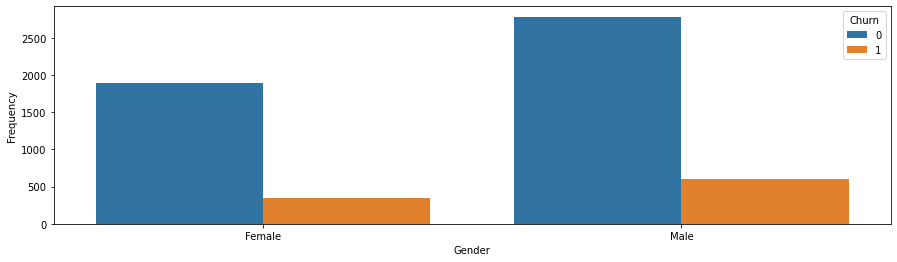

In [16]:
gcrn =data.groupby(['Gender', 'Churn'])['Gender'].count().reset_index(name='Counts')
plt.figure(figsize=(15,4))
sns.barplot(x='Gender', y='Counts', hue="Churn",data=gcrn)
plt.ylabel("Frequency")
plt.show()

- Customer pria lebih banyak daripada wanita
- Namun pria dan perempuan diperkirakan memiliki rata-rata churn yang sama

## Apakah waktu yang dihabiskan customer dalam membuka aplikasi mempengaruhi churn?

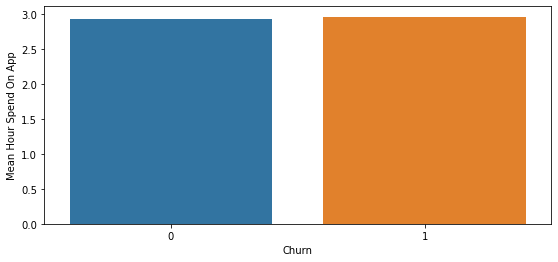

In [17]:
plt.figure(figsize=(20,4))
hspc =data.groupby(['Churn'])['HourSpendOnApp'].mean().reset_index(name='mean')
plt.subplot(122)
sns.barplot(x='Churn', y='mean',data=hspc)
plt.ylabel("Mean Hour Spend On App")
plt.show()

- Waktu yang dihabiskan dalam membuka aplikasi antara customer yan churn dan retain relatif sama.

In [18]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Bagaimana Pengaruh jumlah order dengan Customer Churn

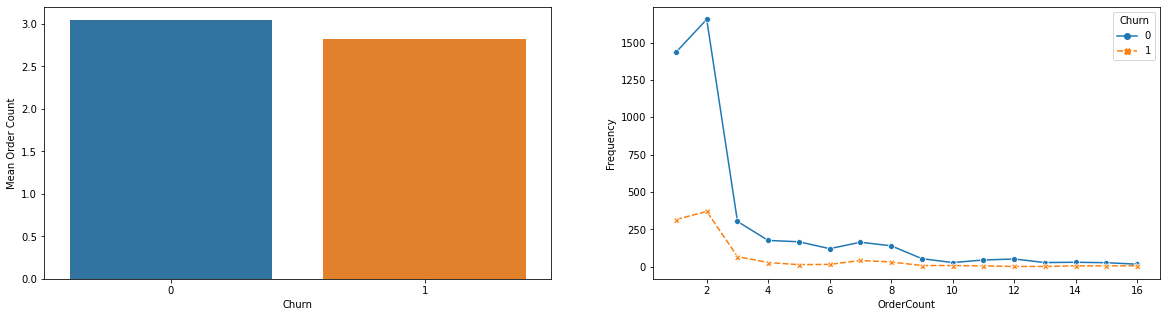

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(121)
odc =data.groupby(['Churn'])['OrderCount'].mean().reset_index(name='mean')
sns.barplot(x='Churn', y='mean',data=odc)
plt.ylabel("Mean Order Count")

plt.subplot(122)
odcl =data.groupby(['OrderCount', 'Churn'])['OrderCount'].count().reset_index(name='Counts')
sns.lineplot(x='OrderCount', y='Counts', hue="Churn",data=odcl, style="Churn",markers=True)
plt.ylabel("Frequency")

plt.show()

- Rata-rata order count dari customer churn dan tidak churn adalah realtif sama
- Customer churn juga ditandai dengan sedikitnya order count

## Apakah complain dari customer mendukung terjadinya churn?

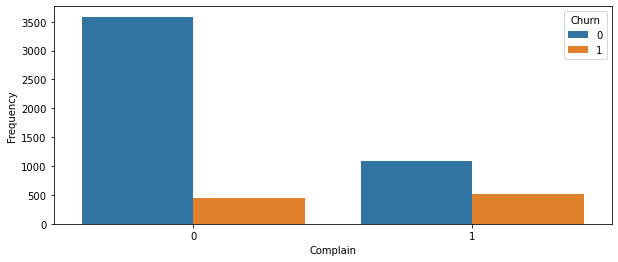

In [20]:
ccrn =data.groupby(['Complain', 'Churn'])['Gender'].count().reset_index(name='Counts')
plt.figure(figsize=(10,4))
sns.barplot(x='Complain', y='Counts', hue="Churn",data=ccrn)
plt.ylabel("Frequency")
plt.show()

- Terdapat lebih banyak customer yang tidak melakukan complain.
- rasio customer yang churn lebih besar pada customer yang complain.

## Apakah tenure dari customer mempengaruhi kemungkinan untuk churn?

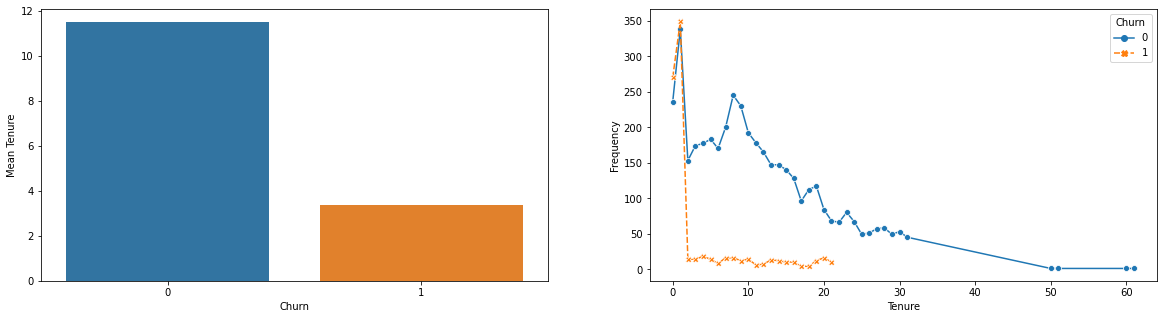

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(121)
odc =data.groupby(['Churn'])['Tenure'].mean().reset_index(name='mean')
sns.barplot(x='Churn', y='mean',data=odc)
plt.ylabel("Mean Tenure")

plt.subplot(122)
odcl =data.groupby(['Tenure', 'Churn'])['OrderCount'].count().reset_index(name='Counts')
sns.lineplot(x='Tenure', y='Counts', hue="Churn",data=odcl, style="Churn",markers=True)
plt.ylabel("Frequency")

plt.show()

- Tenure sangat mempengaruhi customer untuk churn
- Tenure rendah memungkinkan customer untuk churn

## Melihat Korelasi data churn dengan fitur numerikal

<AxesSubplot:title={'center':'Pearson Coefficient Correlation antar Data Numerikal'}>

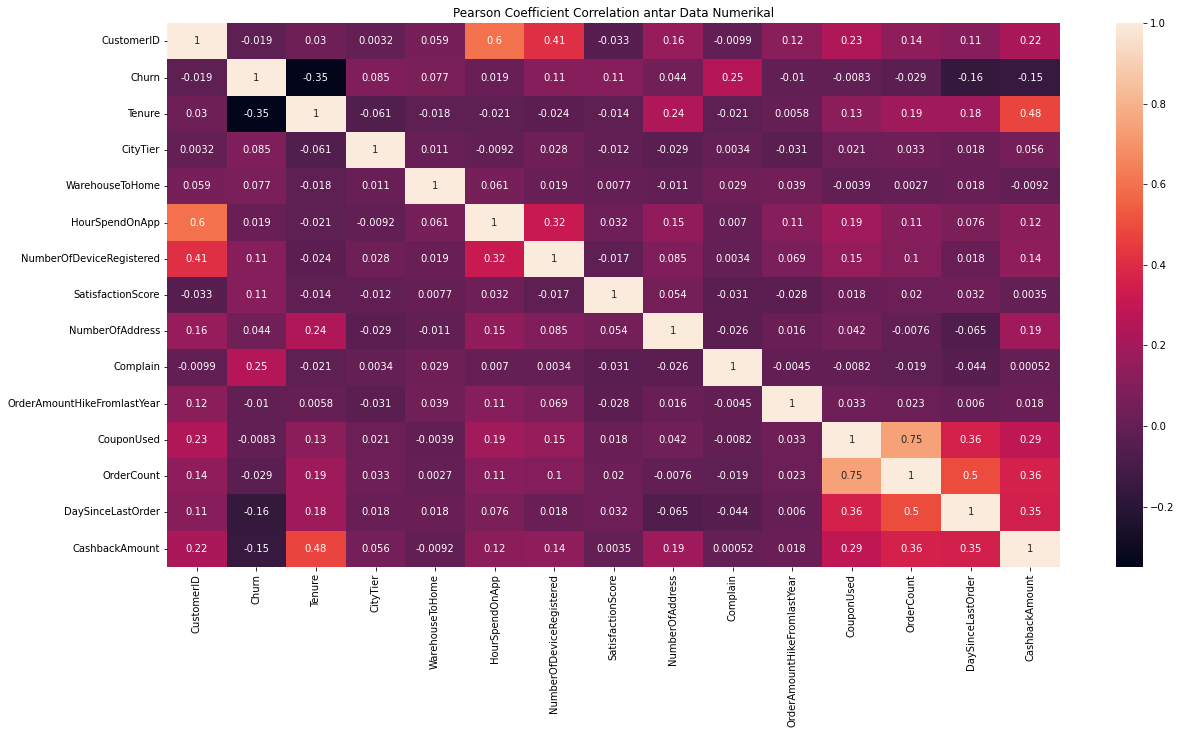

In [22]:
correlation = data.corr()
plt.figure(figsize=(20,10))
plt.title("Pearson Coefficient Correlation antar Data Numerikal")
sns.heatmap(correlation, annot=True)

**Yang memiliki korelasi tinggi diatas (|0.1|) dengan target (Churn) adalah fitur :**

- Cashback Amount
- Day since last order
- Complain
- Satisfaction Score
- Tenure

---
# 5. Data Preprocessing

## 5.1 Mengambil data untuk model inference

Mengambil sample acak inference

In [23]:
data_inf = data.sample(10, random_state=20)
data_inf

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3351,53352,0,17.0,Mobile Phone,1,15.0,Debit Card,Female,3.0,4,Laptop & Accessory,4,Married,6,0,22.0,2.0,2.0,1.0,172.65
2617,52618,0,11.0,Phone,1,12.0,UPI,Female,2.0,4,Mobile Phone,3,Married,2,0,11.0,1.0,1.0,4.0,137.02
2365,52366,0,20.0,Phone,1,7.0,COD,Male,3.0,3,Mobile,1,Married,8,0,12.0,1.0,1.0,2.0,134.20
3437,53438,0,12.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Single,10,1,13.0,2.0,2.0,1.0,193.61
2338,52339,0,0.0,Mobile Phone,3,24.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Married,3,0,11.0,1.0,1.0,2.0,162.32
1183,51184,0,11.0,Mobile Phone,3,8.0,E wallet,Female,3.0,5,Laptop & Accessory,1,Married,3,1,20.0,0.0,1.0,3.0,154.05
3410,53411,1,1.0,Phone,1,29.0,Debit Card,Female,3.0,4,Mobile Phone,3,Divorced,6,1,12.0,1.0,2.0,2.0,146.32
2383,52384,0,21.0,Mobile Phone,3,13.0,E wallet,Male,3.0,3,Laptop & Accessory,5,Married,5,0,11.0,0.0,2.0,2.0,154.86
1165,51166,1,0.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,5,Married,5,0,17.0,0.0,1.0,7.0,153.46
5451,55452,1,1.0,Mobile Phone,1,17.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,3,0,16.0,1.0,2.0,9.0,167.13


Inference set Removal

In [24]:
# Remove Inference Set
data_for_train_test = data.drop(data_inf.index)
data_for_train_test.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Reset index dari Inference set

In [25]:
data_for_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 5.2 Splitting Data

Tahap awal yang dilakukan adalah melakukan splitting data

In [26]:
data.keys()

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

pada tahapan ini, untuk prediktor atau fitur, kolom CustomerID tidak akan digunakan karena data ini unique untuk setiap customer.

In [27]:
X = data_for_train_test[['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]
y = data_for_train_test[['Churn']]
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
5615,0
5616,0
5617,0
5618,0


- Split data untuk proses Train dan Test (Train = 80% dan Test = 20%)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print("Train size :", X_train.shape)
print("Test size :", X_test.shape)

Train size : (4496, 18)
Test size : (1124, 18)


Berikut adalah sebaran presentase dataset terhadap keseluruhan data :

- **X_train   = 80%**
- **X_test    = 20%**

## 5.3 Handling outliers

In [29]:
X_train.keys(
    
)

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

- **Berdasarkan jenis dari data, handling outliers akan dilakukan pada data yang memiliki jenis numerikal (continuous) saja, sehingga pada X_train hanya dilakukan handling outliers untuk kolom 'Tenure', 'WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress' 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount'**

langkah pertama adalah  melakukan cek skewness

In [30]:
num_skewness = ['Tenure', 'WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered',
                'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                'DaySinceLastOrder', 'CashbackAmount']
normdis = []
skewdis = []
for iz in num_skewness :
    skewness = X_train[iz].skew()
    print('Skewness of', iz, "=" ,skewness)
    print(30*"==")
    if skewness<0.5 and skewness>-0.5 :
        normdis.append(iz)
    else:
        skewdis.append(iz)

Skewness of Tenure = 0.707254706100755
Skewness of WarehouseToHome = 1.7809789658528754
Skewness of HourSpendOnApp = -0.019064026890760408
Skewness of NumberOfDeviceRegistered = -0.4005792470963677
Skewness of NumberOfAddress = 1.05749373155457
Skewness of OrderAmountHikeFromlastYear = 0.7906490250677288
Skewness of CouponUsed = 2.5274071964506355
Skewness of OrderCount = 2.160465393035999
Skewness of DaySinceLastOrder = 1.2656173798201091
Skewness of CashbackAmount = 1.1312110805545803


In [31]:
print("normal distribution :",normdis)
print("skew distribution :", skewdis)

normal distribution : ['HourSpendOnApp', 'NumberOfDeviceRegistered']
skew distribution : ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


Berdasarkan hasil cek skewness, kolom 'HourSpendOnApp' dan 'NumberOfDeviceRegistered' memiliki distribusi data yang normal. Sedangkan kolom numerik lainnya memiliki jenis skew.

kemudian akan dilakukan cek presentase data outliers untuk memutuskan ditrimming atau tidak?

Pertama kita cek data yang skew terlebih dahulu

In [32]:
threshold = 1.5
for i in skewdis :
        IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
        upper = X_train[i].quantile(0.75) + (threshold*IQR)
        lower = X_train[i].quantile(0.25) - (threshold*IQR)
        
        inner = X_train[(X_train[i] < upper) & (X_train[i] > lower)][i].count()
        outer = ((X_train[i].count() - inner) / (X_train[i].count() + inner))*100
        jumlah_out = (X_train[i].count() - inner)
        print(i, "memiliki outliers sebesar =", jumlah_out, "data dengan presentase", outer,"%")
        print("Upperboundary =", upper)
        print("Lowerboundary =", lower)
        print(30*"==+") 
        

Tenure memiliki outliers sebesar = 2 data dengan presentase 0.023353573096683792 %
Upperboundary = 37.0
Lowerboundary = -19.0
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
WarehouseToHome memiliki outliers sebesar = 2 data dengan presentase 0.02326122354035822 %
Upperboundary = 36.5
Lowerboundary = -7.5
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
NumberOfAddress memiliki outliers sebesar = 2 data dengan presentase 0.02224694104560623 %
Upperboundary = 12.0
Lowerboundary = -4.0
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
OrderAmountHikeFromlastYear memiliki outliers sebesar = 27 data dengan presentase 0.31523642732049034 %
Upperboundary = 25.5
Lowerboundary = 5.5
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
CouponUsed memiliki outliers sebesar = 509 data dengan presentase 6.303405572755418 %
Upperboundary

Berikutnya kita cek presentase outliers di data dengan distribusi normal

In [33]:
for i in normdis :
        upper_out = X_train[i].mean() + (3*X_train[i].mean())
        lower_out = X_train[i].mean() - (3*X_train[i].mean())
        
        inner = X_train[(X_train[i] < upper_out) & (X_train[i] > lower_out)][i].count()
        outer = ((X_train[i].count() - inner) / (X_train[i].count() + inner))*100
        jumlah_out = (X_train[i].count() - inner)
        print(i, "memiliki outliers sebesar =", jumlah_out, "data dengan presentase", outer,"%")
        print("Upperboundary =", upper_out)
        print("Lowerboundary =", lower_out)
        print(30*"==+") 
        

HourSpendOnApp memiliki outliers sebesar = 0 data dengan presentase 0.0 %
Upperboundary = 11.704186046511628
Lowerboundary = -5.852093023255813
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+
NumberOfDeviceRegistered memiliki outliers sebesar = 0 data dengan presentase 0.0 %
Upperboundary = 14.732206405693951
Lowerboundary = -7.3661032028469755
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+


Ternyata pada kolom 'HourSpendOnApp' dan 'NumberOfDeviceRegistered', tidak terdapat outliers sehingga tidak perlu dilakukan capping pada kedua kolom ini.

**Statement Handling Outliers**
- Walaupun masing-masing presentase outliers dengan keseluruhan data masih dibawah 10%, tetapi jika diakumulasikan akan cukup banyak. sehingga diputuskan untuk tidak melakukan trimming, tetapi akan dilakukan capping agar jumlah data tetap terjaga.

In [34]:
skewdis

['Tenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [35]:
winsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                       tail='both', # cap left, right or both tails 
                       fold=1.5,
                       missing_values="ignore",
                       variables=['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear',
                                  'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'])

winsorizer.fit(X_train)

X_capped = winsorizer.transform(X_train)

In [36]:
print("y_train :",y_train.shape)
print("X_train :",X_capped.shape)


y_train : (4496, 1)
X_train : (4496, 18)


## 5.4 Handling Missing Value

In [37]:
X_capped.isnull().sum()

Tenure                         213
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                196
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 196
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    200
CouponUsed                     204
OrderCount                     211
DaySinceLastOrder              247
CashbackAmount                   0
dtype: int64

In [38]:
X_test.isnull().sum()

Tenure                         51
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                55
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 59
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    65
CouponUsed                     52
OrderCount                     47
DaySinceLastOrder              60
CashbackAmount                  0
dtype: int64

**Karena terdapat missing value pada beberapa kolom pada data yang digunakan (train dan test), maka akan dilakukan handling missing value sesuai dengan jenis distribusi datanya, karena sluruh data yang terdapat missing value memiliki distribusi yang skew, maka akan digunakan dilakukan imputasi dengan nilai median.** 

In [39]:
num_cols = X_capped.select_dtypes(include=np.number).columns.tolist()
non_num_cols = X_capped.select_dtypes(include=('object')).columns.tolist()

print("Numerical Columns :", num_cols)
print("Non Numerical Columns :", non_num_cols)

Numerical Columns : ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Non Numerical Columns : ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


Dibawah ini akan dilakukan imputasi dengan menggunakan simple imputer, imputasi untuk data numerikal akan menggunakan median lalu untuk data non numerikal akan menggunakan most frequent value.

In [40]:
impute_median = SimpleImputer(strategy='median')
impute_most_freq = SimpleImputer(strategy='most_frequent')
X_train_numclean = impute_median.fit_transform(X_capped[num_cols])
X_test_numclean = impute_median.transform(X_test[num_cols])
X_train_non_numclean = impute_most_freq.fit_transform(X_capped[non_num_cols])
X_test_non_numclean = impute_most_freq.transform(X_test[non_num_cols])


Script diatas digunakan untuk melakukan imputasi

In [41]:
X_train = np.concatenate([X_train_numclean ,X_train_non_numclean],axis=1)
X_test = np.concatenate([X_test_numclean, X_test_non_numclean],axis=1)

In [42]:
colfor_missvall = num_cols+non_num_cols

In [43]:
X_train = pd.DataFrame(X_train,columns=colfor_missvall)
X_test = pd.DataFrame(X_test,columns=colfor_missvall)

In [44]:
print("missing value in X_train :",X_train.isnull().sum().sum())
print("missing value in X_test :",X_test.isnull().sum().sum())

missing value in X_train : 0
missing value in X_test : 0


Missing Value yang terdapat pada X_train dan X_test telah hilang.

## 5.6 Handle Imbalance

In [45]:
X_train.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,10.0,2.0,20.0,3.0,4.0,4.0,5.0,0.0,14.0,2.0,2.0,5.0,146.43,Phone,UPI,Male,Mobile Phone,Divorced
1,18.0,1.0,13.0,3.0,2.0,3.0,5.0,0.0,17.0,0.0,1.0,2.0,164.34,Computer,Debit Card,Male,Laptop & Accessory,Divorced
2,21.0,1.0,14.0,3.0,3.0,5.0,9.0,0.0,12.0,3.5,6.0,6.0,123.67,Phone,UPI,Female,Mobile,Married
3,18.0,1.0,6.0,3.0,2.0,2.0,1.0,0.0,15.0,1.0,1.0,7.0,272.00375,Mobile Phone,UPI,Male,Others,Divorced
4,1.0,3.0,19.0,3.0,2.0,4.0,3.0,0.0,16.0,1.0,2.0,1.0,152.16,Mobile Phone,Debit Card,Female,Mobile Phone,Single


In [46]:
X_train.columns

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

Berdasarkan tabel diatas, yang akan dimasukan kedalam categorical_features pada tahapan smotenc adalah **'CityTier', 'SatisfactionScore', 'Complain', 'PreferredLoginDevice','PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'.**

In [47]:
smotenc = SMOTENC(categorical_features=[1,5,7,13,14,15,16,17], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

Churn
0        3753
1        3753
dtype: int64

Dari hasil y_train_balanced dapat terlihat bahwa target telah balance antara customer churn dan no churn

Kemudian akan dicek kembali hasil smotenc untuk data kategorikal

In [48]:
X_train_balanced["CityTier"].value_counts()

1.0    4584
3.0    2680
2.0     242
Name: CityTier, dtype: int64

unique values pada city tier tetap berkisar dari 1-3

In [49]:
X_train_balanced["SatisfactionScore"].value_counts()

3.0    2355
5.0    1939
4.0    1429
1.0    1229
2.0     554
Name: SatisfactionScore, dtype: int64

unique values pada satisfaction score tetap berkisar dari 1-5

In [50]:
X_train_balanced["MaritalStatus"].value_counts()

Married     3455
Single      3250
Divorced     801
Name: MaritalStatus, dtype: int64

unique values pada marital status tetap terbentuk 3 yaitu married, single dan divorced

Kemudian variabel yang telah dilakukan balancing dikembalikan dalam X_train dan y_train.

In [51]:
X_train = X_train_balanced
y_train = y_train_balanced

## 5.7 Feature Selection

In [52]:
X_train.head(5)

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,10.0,2.0,20.0,3.0,4.0,4.0,5.0,0.0,14.0,2.0,2.0,5.0,146.43,Phone,UPI,Male,Mobile Phone,Divorced
1,18.0,1.0,13.0,3.0,2.0,3.0,5.0,0.0,17.0,0.0,1.0,2.0,164.34,Computer,Debit Card,Male,Laptop & Accessory,Divorced
2,21.0,1.0,14.0,3.0,3.0,5.0,9.0,0.0,12.0,3.5,6.0,6.0,123.67,Phone,UPI,Female,Mobile,Married
3,18.0,1.0,6.0,3.0,2.0,2.0,1.0,0.0,15.0,1.0,1.0,7.0,272.00375,Mobile Phone,UPI,Male,Others,Divorced
4,1.0,3.0,19.0,3.0,2.0,4.0,3.0,0.0,16.0,1.0,2.0,1.0,152.16,Mobile Phone,Debit Card,Female,Mobile Phone,Single


Berdasarkan analisa data yang telah dilakukan pada tahap EDA, kesemua fitur kecuali customer ID memiliki korelasi dengan target, sehingga untuk tahapan selanjutnya akan digunakan semua fitur kecuali kolom target dan customer id pada X_train

## 5.8 Split Numerical and Categorical 

In [53]:
X_train.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,10.0,2.0,20.0,3.0,4.0,4.0,5.0,0.0,14.0,2.0,2.0,5.0,146.43,Phone,UPI,Male,Mobile Phone,Divorced
1,18.0,1.0,13.0,3.0,2.0,3.0,5.0,0.0,17.0,0.0,1.0,2.0,164.34,Computer,Debit Card,Male,Laptop & Accessory,Divorced
2,21.0,1.0,14.0,3.0,3.0,5.0,9.0,0.0,12.0,3.5,6.0,6.0,123.67,Phone,UPI,Female,Mobile,Married
3,18.0,1.0,6.0,3.0,2.0,2.0,1.0,0.0,15.0,1.0,1.0,7.0,272.00375,Mobile Phone,UPI,Male,Others,Divorced
4,1.0,3.0,19.0,3.0,2.0,4.0,3.0,0.0,16.0,1.0,2.0,1.0,152.16,Mobile Phone,Debit Card,Female,Mobile Phone,Single


Untuk mempermudah tahapan feature scaling dan encoding, dilakukan pemisahan antara data categorical dan numerikal terlebih dahulu,, dengan script dibawah ini.

In [54]:
numerical_cols = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress', 
                  'OrderAmountHikeFromlastYear', "CouponUsed", "OrderCount", "DaySinceLastOrder","CashbackAmount"]
nominal_cols = ["PreferredLoginDevice",	"PreferredPaymentMode",	"Gender", "PreferedOrderCat", "MaritalStatus"]
no_encode_cols = ["Complain", "CityTier", "SatisfactionScore", ]

- Kolom ordinal seperti pada kolom CityTier dan SatisfactionScore tidak dilakukan ordinal encoding karena sudah dalam bentuk numerik.
- kolom/fitur nominal Complain tidak dimasukan kedalam onehotencoder karena sudah dalam bentuk binary.

Kemudian kolom diurutkan untuk menghindari terjaidnya error pada pipeline karena perbedaan kolom.

In [55]:
final = numerical_cols + nominal_cols + no_encode_cols 

In [56]:
X_train = X_train[final]
X_test = X_test[final]

## 5.9 Feature Scaling and Encoding

Dilakukan definisi menggunakan column transformer untuk memasukan scaling dan encoding pada pipeline sklearn

In [57]:
# Make the Feature Engineering Pipeline
# pipeline_fe_fs = ColumnTransformer([('minmaxScaler', MinMaxScaler(), num_cols)])  
pipeline_fe_fs = ColumnTransformer([
    ('minmaxScaler', MinMaxScaler(), numerical_cols),
    ('OHE', OneHotEncoder(), nominal_cols)
])  

---
# 6. Model Definition

Pada tugas ini, kita akan menggunakan beberapa algoritma machine learning yaitu :
1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest
5. KNN
6. Naive Bayes
7. XGboost
8. Adaboost

dibawah ini akan dilakukan pendefinisian model dengan :
- initial model (model dengan parameter default)
- model pipeline (Pipeline untuk seriap model dengan langsung melakukan tahapan preprocessing hingga fit model)
- Hyperparameter (pendefinisian hyperparameter untuk setiap model jika berlanjut ke hyperparameter tuning/gridsearch)

In [58]:
randomstate = 17

**Logistic Regression**

In [59]:
# Initial Model
logreg = LogisticRegression(random_state=randomstate)

# Model Pipeline
pipe_logreg = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('logreg', logreg)
])

# Hyperparameter
params_logreg = {
    'logreg__solvers': ['newton-cg', 'lbfgs', 'liblinear'],
    'logreg__min_penalty': ['l1','l2'],
    'logreg__C': list(np.linspace(1.0,100.0,100))
}

**SVM**

In [60]:
# Initial Model
svc= SVC(random_state=randomstate)

# Model Pipeline
pipe_svc = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('svc', svc)
])

# Hyperparameter
params_svc = {
    'svc__C': list(np.linspace(1,100.0,100)),
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf']
}

**Decision Tree**

In [61]:
# Initial Model
dt= DecisionTreeClassifier(random_state=randomstate)

# Model Pipeline
pipe_dt = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('dt', dt)
])

# Hyperparameter
params_dt = {
    'dt__max_depth': ['None',2, 3, 5, 10, 20],
    'dt__min_samples_leaf': [10,50,100,150,200,250,300],
    'dt__criterion': ["gini", "entropy"]
}

**Random Forest**

In [62]:
# Initial Model
rf= RandomForestClassifier(random_state=randomstate)

# Model Pipeline
pipe_rf = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('rf', rf)
])

# Hyperparameter
params_rf = {
    'rf__n_estimators': [1,10,100,1000],
    'rf__max_depth': ['None',1,10,100],
    'rf__criterion': ["gini", "entropy"]
}

**KNN**

In [63]:
# Initial Model
knn= KNeighborsClassifier()

# Model Pipeline
pipe_knn = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('knn', knn)
])

# Hyperparameter
params_knn = {
    'knn__n_neighbors': list(np.arange(1,101,1)),
    'knn__weights': ['uniform','distance'],
    'knn__algorithm': ["auto"]
}

**Naive Bayes**

In [64]:
# Initial Model
nb= GaussianNB()

# Model Pipeline
pipe_nb = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('nb', nb)
])

# Hyperparameter
params_nb = {
    'nb__var_smoothing': list(np.logspace(0,-9, num=100)),
}


**XGboost**

In [65]:
# Initial Model
xg = GradientBoostingClassifier(random_state=randomstate)

# Model Pipeline
pipe_xg = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('xg', xg)
])

# Hyperparameter
params_xg = {
    'xg__learning_rate': [0.1,1.0],
    'xg__n_estimators': [1,10,100,1000],
    'xg__criterion': ["friedman_mse", "mse", "squared_error"]
}

**Adaboost**

In [66]:
# Initial Model
ad = AdaBoostClassifier(random_state=randomstate)

# Model Pipeline
pipe_ad = Pipeline([
    ('preprocessing', pipeline_fe_fs),
    ('ad', ad)
])

# Hyperparameter
params_ad = {
    'ad__learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'ad__n_estimators': [1,10,100,1000],
    'ad__algorithm': ["SAMME", "SAMME.R"]}

---
# 7. Model Training

**Pada tahapan ini, dilakukan model training menggunakan model default dengan memanfaatkan pipeline yang telah disiapkan pada model definition**

**Logistic Regression**

In [67]:
model_logreg = pipe_logreg.fit(X_train,y_train)

**SVC**

In [68]:
model_svc = pipe_svc.fit(X_train,y_train)

**Decision Tree**

In [69]:
model_dt = pipe_dt.fit(X_train,y_train)

**Random Forest**

In [70]:
model_rf = pipe_rf.fit(X_train,y_train)

**KNN**

In [71]:
model_knn = pipe_knn.fit(X_train,y_train)

**Naive Bayes**

In [72]:
model_nb = pipe_nb.fit(X_train,y_train)

**XGboost**

In [73]:
model_xg = pipe_xg.fit(X_train,y_train)

**Adaboost**

In [74]:
model_ad = pipe_ad.fit(X_train,y_train)

In [75]:
model = [model_logreg,model_svc, model_dt, model_rf, model_knn, model_nb, model_xg, model_ad]

---
# 8. Model Evaluation

**Setelah dilakukan training model, langkah selanjutnya adalah melakukan evaluasi terhadap defaukt model yang telah dilakukan sebelumnya.**

Langkah awal adalah melakukan pemilihan 2 model terbaik dengan menggunakan cross validation, seperti dibawah ini.

In [76]:
name = ["logistic_regression", "SVC", "Decision_Tree", "Random_Forest", "KNN", "Naive Bayes (Gaussian)", "XGBoost", "Adaboost"]

In [77]:
mean_score = []
std_dev = []
for i in model :
    # print(i)
    cvscore = cross_val_score(i,X_train, y_train, cv=5, scoring='f1')
    mean_score.append(np.nanmean(cvscore))
    std_dev.append(np.nanstd(cvscore))

In [78]:
hasil_cross_validation = pd.DataFrame({'Algorithm' : name, 'mean_score' : mean_score, 'std_dev' : std_dev})
hasil_cross_validation = hasil_cross_validation.sort_values(by = 'mean_score', ascending = False)

In [79]:
hasil_cross_validation

,Algorithm,mean_score,std_dev
3,Random_Forest,0.940646,0.064662
2,Decision_Tree,0.909828,0.055207
6,XGBoost,0.889272,0.105474
7,Adaboost,0.868397,0.086798
1,SVC,0.852066,0.044719
4,KNN,0.844263,0.060745
0,logistic_regression,0.806360,0.026425
5,Naive Bayes (Gaussian),0.738437,0.031149


Didapatkan 3 model terbaik adalah pada saat menggunakan algoritma **Random Forest**, **Decision Tree**, **XGBoost** karena memiliki nilai mean score paling tinggi.

**Analisa Hasil Model Default RF**

In [80]:
y_pred_train1 = model_rf.predict(X_train)
y_pred_test1 = model_rf.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train1))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train1))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test1))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test1))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3753
           1       1.00      1.00      1.00      3753

    accuracy                           1.00      7506
   macro avg       1.00      1.00      1.00      7506
weighted avg       1.00      1.00      1.00      7506

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       922
           1       0.88      0.80      0.84       202

    accuracy                           0.94      1124
   macro avg       0.92      0.89      0.90      1124
weighted avg       0.94      0.94      0.94      1124

roc-auc-score :
0.888517213977363


**Analisa Model Default RF**
- Dari hasil classsification report diatas, dapat dikatakan bahwa model RF default masih terjadi overfit.
- pada dataset test, model ini memiliki f-1 score yang rendah lebih rendah pada 1, yang artinya memiliki tingkat precision yang cukup baik untuk memprediksi kategori 1 (Customer Churn), namun tidak lebih baik daripada untuk memprediksi kategori 0 (No Churn Customer).

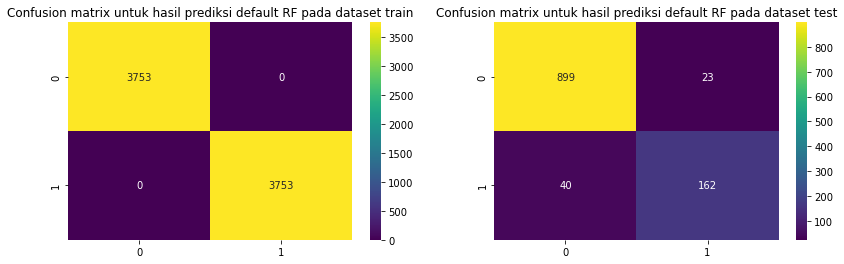

In [81]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi default RF pada dataset train")
cm1 = confusion_matrix(y_train, y_pred_train1, labels=model_rf.classes_)
sns.heatmap(cm1, annot=True, fmt='g', cmap='viridis')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi default RF pada dataset test")
cm2 = confusion_matrix(y_test, y_pred_test1, labels=model_rf.classes_)
sns.heatmap(cm2, annot=True, fmt='g', cmap='viridis')
plt.show()

- Confusion matrix pada dataset training menunjukan hasil yang sempurna, yang dimana hal ini cukup menjadi pertanyaan (?)
- Pada dataset test confusion matrix, menujukan hasil yangtidak terlalu buruk, dari 202 True "1" terjadi kesalahan dalam memprediksi sebanyak 40 titik.

**Analisa Hasil Model Default Decision Tree**

In [82]:
y_pred_train2 = model_dt.predict(X_train)
y_pred_test2 = model_dt.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train2))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train2))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test2))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test2))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3753
           1       1.00      1.00      1.00      3753

    accuracy                           1.00      7506
   macro avg       1.00      1.00      1.00      7506
weighted avg       1.00      1.00      1.00      7506

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       922
           1       0.77      0.84      0.81       202

    accuracy                           0.93      1124
   macro avg       0.87      0.89      0.88      1124
weighted avg       0.93      0.93      0.93      1124

roc-auc-score :
0.8936771117458816


**Analisa Model Default Decision Tree**
- Dari hasil classsification report diatas, dapat dikatakan bahwa model Decision tree masih terjadi overfitting.
- Pada model ini nilai akurasi pada dataset test yang dihasilkan lebih rendah daripada algoritma Random forest default.

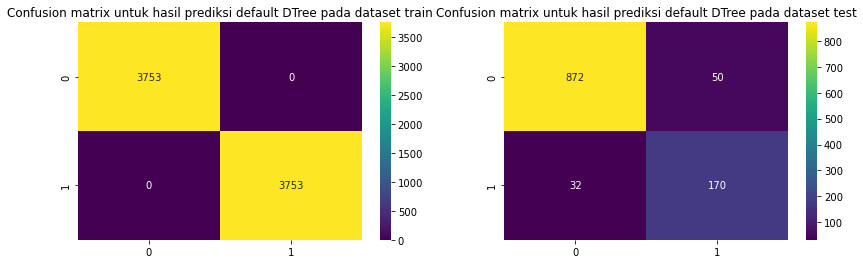

In [83]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi default DTree pada dataset train")
cm3 = confusion_matrix(y_train, y_pred_train2, labels=model_knn.classes_)
sns.heatmap(cm3, annot=True, fmt='g', cmap='viridis')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi default DTree pada dataset test")
cm4 = confusion_matrix(y_test, y_pred_test2, labels=model_knn.classes_)
sns.heatmap(cm4, annot=True, fmt='g', cmap='viridis')
plt.show()

- Berdasarkan hasil confusi0n matrix pada dataset test, dapat terlihat bahwa True 1 dapat terprediksi lebih banyak daripada hasil model random forest. namun sebagai konsekuensinya nilai false "0" semakin meningkat.

**Analisa Hasil Model Default XGboost**

In [84]:
y_pred_train3 = model_xg.predict(X_train)
y_pred_test3 = model_xg.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train3))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train3))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test3))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test3))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3753
           1       0.93      0.92      0.93      3753

    accuracy                           0.93      7506
   macro avg       0.93      0.93      0.93      7506
weighted avg       0.93      0.93      0.93      7506

roc-auc-score :
0.9263256061817212
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       922
           1       0.65      0.64      0.65       202

    accuracy                           0.87      1124
   macro avg       0.78      0.78      0.78      1124
weighted avg       0.87      0.87      0.87      1124

roc-auc-score :
0.7832789244217264


**Analisa Model Default XGBoost**
- Dari hasil classsification report diatas, dapat dikatakan bahwa model XGBoost sudah mendekati goodfit dengan score training yang tidak terlalu sempurna seperti pada kedua model sebelumnya.
- Namun sebagai konsekuensinya, nilai roc-auc-score dari kedua dataset yang dicoba memiliki score yang lebih kecil.
- Pada model ini f-1 score pada "1" mengalami penurunan dari kedua model sebelumnnya yang artinya prediksi jika target seharusnya churn akan mungkin terjadi kesalahan.

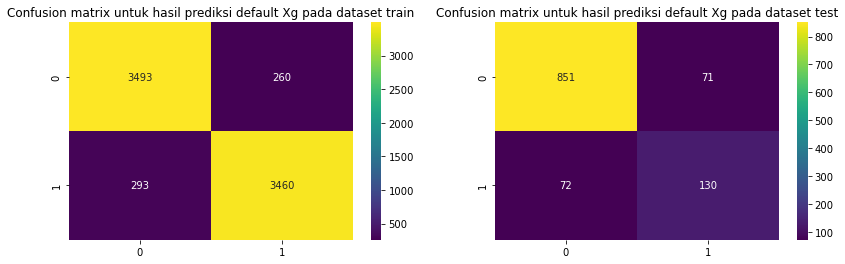

In [85]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi default Xg pada dataset train")
cm5 = confusion_matrix(y_train, y_pred_train3, labels=model_knn.classes_)
sns.heatmap(cm5, annot=True, fmt='g', cmap='viridis')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi default Xg pada dataset test")
cm6 = confusion_matrix(y_test, y_pred_test3, labels=model_knn.classes_)
sns.heatmap(cm6, annot=True, fmt='g', cmap='viridis')
plt.show()

- Terlihat bahwa kesalahan prediksi pada kedua confusion matrix menghasilkan jumlah yang relatif seimbang, sehingga hasil ini bisa dikatakan cukup baik.

---
**Berikut ini akan dilakukan hyperparameter tuning dengan menggunakan Grid Search CV pada algoritma yang memiliki hasil score terbaik yaitu Random Forest, Decision Tree, dan XGBoost**

**Random Forest**

In [86]:
gscv1 = GridSearchCV(pipe_rf, params_rf, cv=5, scoring='f1')

best_model_gscv1 = gscv1.fit(X_train, y_train)

best_rf_pipe = gscv1.best_estimator_

In [87]:
print(gscv1.best_params_)

{'rf__criterion': 'entropy', 'rf__max_depth': 100, 'rf__n_estimators': 100}


In [88]:
y_pred_train1_best = best_rf_pipe.predict(X_train)
y_pred_test1_best = best_rf_pipe.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train1_best))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train1_best))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test1_best))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test1_best))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3753
           1       1.00      1.00      1.00      3753

    accuracy                           1.00      7506
   macro avg       1.00      1.00      1.00      7506
weighted avg       1.00      1.00      1.00      7506

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       922
           1       0.89      0.79      0.84       202

    accuracy                           0.95      1124
   macro avg       0.92      0.89      0.90      1124
weighted avg       0.94      0.95      0.94      1124

roc-auc-score :
0.8857359163248212


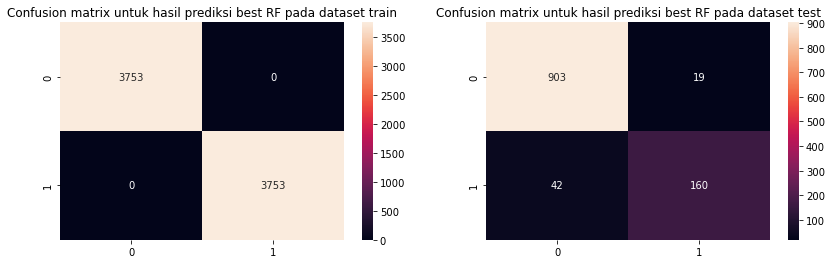

In [89]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi best RF pada dataset train")
cm5 = confusion_matrix(y_train, y_pred_train1_best, labels=best_rf_pipe.classes_)
sns.heatmap(cm5, annot=True, fmt='g')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi best RF pada dataset test")
cm6 = confusion_matrix(y_test, y_pred_test1_best, labels=best_rf_pipe.classes_)
sns.heatmap(cm6, annot=True, fmt='g')
plt.show()

**Analisa Model Best Params RF**
- Dari hasil classsification report diatas, dapat dikatakan bahwa model Gaussian NB default tidak masih sedikit overfit
- Akurasi menjadi lebih baik dari sebelum dilakukan tuning. Tetapi sebagai konsekuensi dari berkurangnya kesalahan prediksi dari true 0 maka kesalahan prediksi pada false 1 yang meningkat.

**Decision Tree**

In [90]:
gscv2 = GridSearchCV(pipe_dt, params_dt, cv=5, scoring='f1')

best_model_gscv2 = gscv2.fit(X_train, y_train)

best_dt_pipe = gscv2.best_estimator_

In [91]:
print(gscv2.best_params_)

{'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__min_samples_leaf': 10}


In [92]:
y_pred_train2_best = best_dt_pipe.predict(X_train)
y_pred_test2_best = best_dt_pipe.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train2_best))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train2_best))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test2_best))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test2_best))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3753
           1       0.93      0.92      0.93      3753

    accuracy                           0.93      7506
   macro avg       0.93      0.93      0.93      7506
weighted avg       0.93      0.93      0.93      7506

roc-auc-score :
0.9283240074606981
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       922
           1       0.57      0.69      0.62       202

    accuracy                           0.85      1124
   macro avg       0.75      0.79      0.76      1124
weighted avg       0.86      0.85      0.85      1124

roc-auc-score :
0.7860333755718305


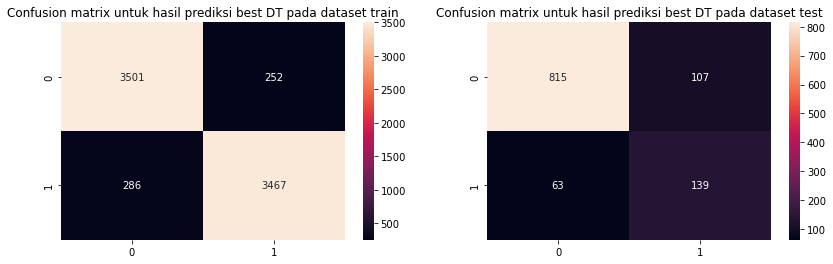

In [93]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi best DT pada dataset train")
cm7 = confusion_matrix(y_train, y_pred_train2_best, labels=best_dt_pipe.classes_)
sns.heatmap(cm7, annot=True, fmt='g')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi best DT pada dataset test")
cm8 = confusion_matrix(y_test, y_pred_test2_best, labels=best_dt_pipe.classes_)
sns.heatmap(cm8, annot=True, fmt='g')
plt.show()

**Analisa Model Best Params DT**
- Setelah dilakukan hyperparameter tuning, akurasi pada training menurun namun sudah tidak overfitting.
- pada dataset test mengalami penurunan f1-score dan roc-auc-score dibandingkan sebelum tuning.
- model ini memprediksi true 1 lebih buruk daripada sebelum dilakukan tuning.

**XG Boost**

In [94]:
gscv3 = GridSearchCV(pipe_xg, params_xg, cv=5, scoring='f1')

best_model_gscv3 = gscv3.fit(X_train, y_train)

best_xg_pipe = gscv3.best_estimator_

In [95]:
print(gscv3.best_params_)

{'xg__criterion': 'friedman_mse', 'xg__learning_rate': 1.0, 'xg__n_estimators': 1000}


In [96]:
y_pred_train3_best = best_xg_pipe.predict(X_train)
y_pred_test3_best = best_xg_pipe.predict(X_test)

print(">>> Dataset Train :")
print(classification_report(y_train,y_pred_train3_best))
print("roc-auc-score :")
print(roc_auc_score(y_train,y_pred_train3_best))
print(">>> Dataset Test :")
print(classification_report(y_test,y_pred_test3_best))
print("roc-auc-score :")
print(roc_auc_score(y_test,y_pred_test3_best))

>>> Dataset Train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3753
           1       1.00      1.00      1.00      3753

    accuracy                           1.00      7506
   macro avg       1.00      1.00      1.00      7506
weighted avg       1.00      1.00      1.00      7506

roc-auc-score :
1.0
>>> Dataset Test :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       922
           1       0.94      0.89      0.92       202

    accuracy                           0.97      1124
   macro avg       0.96      0.94      0.95      1124
weighted avg       0.97      0.97      0.97      1124

roc-auc-score :
0.9395792616137969


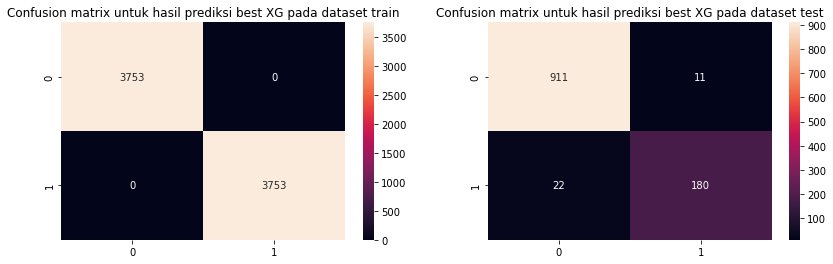

In [97]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title("Confusion matrix untuk hasil prediksi best XG pada dataset train")
cm7 = confusion_matrix(y_train, y_pred_train3_best, labels=best_xg_pipe.classes_)
sns.heatmap(cm7, annot=True, fmt='g')
plt.subplot(122)
plt.title("Confusion matrix untuk hasil prediksi best XG pada dataset test")
cm8 = confusion_matrix(y_test, y_pred_test3_best, labels=best_xg_pipe.classes_)
sns.heatmap(cm8, annot=True, fmt='g')
plt.show()

**Analisa Model Best Params XGBoost**
- Dari hasil diatas, score pada keseluruhan metrics pada penggunaan algoritma XGBoost meningkat pesat dibandingkan sebelum hyperparameter tuning.
- Model ini mmemberikan hasil miss prediksi pada true 1 dan true 0 pada dataset test yang sangat minimum, sehingga dapat dikatakan model ini adalah yang memiliki performa paling baik.

**PEMILIHAN BEST MODEL SECARA KESELURUHAN**

1. **RF Default**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.8885
2. **RF after hyperparameter tuning**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.8857
3. **DT Default**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.894
4. **DT after hyperparameter tuning**
    - roc-auc-score train = 0.928
    - roc-auc-score test = 0.786
5. **XGBoost Default**
    - roc-auc-score train = 0.926
    - roc-auc-score test = 0.783
6. **XGBoost after hyperparameter tuning**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.939

**Sehingga dari score roc-auc diatas, dapat diambil kesimpulan bahwa model terbaik dengan score roc-auc-score pada dataset test tertinggi adalah XGBoost setelah dilakukan tuning hyperparameter dengan parameter {'xg__criterion': 'friedman_mse', 'xg__learning_rate': 1.0, 'xg__n_estimators': 1000}.**

---
# 9. Model Savings

Setelah itu seluruh fitur prediktor dan model terbaik akan disave menggunakan library pickle.

In [98]:
# Model Savings

with open('all_feature.txt','w') as file_1 :
    file_1.write(str(final))
    
with open('best_default_model_rf.pkl', 'wb') as file_2 :
    pickle.dump(model_rf,file_2)

with open('best_hyperparams_tuning_rf.pkl', 'wb') as file_3 :
    pickle.dump(best_rf_pipe,file_3)
    
with open('best_default_model_dt.pkl', 'wb') as file_4 :
    pickle.dump(model_dt,file_4)

with open('best_hyperparams_tuning_dt.pkl', 'wb') as file_5 :
    pickle.dump(best_dt_pipe,file_5)
    
with open('best_default_model_xg.pkl', 'wb') as file_6 :
    pickle.dump(model_xg,file_6)

with open('best_hyperparams_tuning_xg.pkl', 'wb') as file_7 :
    pickle.dump(best_xg_pipe,file_7)

---
# 10. Model Inference

In [99]:
data_inf

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,53352,0,17.0,Mobile Phone,1,15.0,Debit Card,Female,3.0,4,Laptop & Accessory,4,Married,6,0,22.0,2.0,2.0,1.0,172.65
1,52618,0,11.0,Phone,1,12.0,UPI,Female,2.0,4,Mobile Phone,3,Married,2,0,11.0,1.0,1.0,4.0,137.02
2,52366,0,20.0,Phone,1,7.0,COD,Male,3.0,3,Mobile,1,Married,8,0,12.0,1.0,1.0,2.0,134.20
3,53438,0,12.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Single,10,1,13.0,2.0,2.0,1.0,193.61
4,52339,0,0.0,Mobile Phone,3,24.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Married,3,0,11.0,1.0,1.0,2.0,162.32
5,51184,0,11.0,Mobile Phone,3,8.0,E wallet,Female,3.0,5,Laptop & Accessory,1,Married,3,1,20.0,0.0,1.0,3.0,154.05
6,53411,1,1.0,Phone,1,29.0,Debit Card,Female,3.0,4,Mobile Phone,3,Divorced,6,1,12.0,1.0,2.0,2.0,146.32
7,52384,0,21.0,Mobile Phone,3,13.0,E wallet,Male,3.0,3,Laptop & Accessory,5,Married,5,0,11.0,0.0,2.0,2.0,154.86
8,51166,1,0.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,5,Married,5,0,17.0,0.0,1.0,7.0,153.46
9,55452,1,1.0,Mobile Phone,1,17.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,3,0,16.0,1.0,2.0,9.0,167.13


**Load Model**

In [100]:
with open('all_feature.txt','r') as file_1:
    all_feature_predictor = file_1.read()
with open('best_default_model_xg.pkl','rb') as file_2:
    model_def_xg = pickle.load(file_2)
with open('best_hyperparams_tuning_xg.pkl','rb') as file_3:
    model_hyp_tune_xg = pickle.load(file_3)

**Pick The Predictor**

In [101]:
all_feature_predictor = ast.literal_eval(all_feature_predictor)
data_inf_final = data_inf[all_feature_predictor]

**Execute the Model (Default Random Forest)**

In [102]:
y_inf_pred1 = model_def_xg.predict(data_inf_final)
y_inf_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

**Execute the Model (Best Params Random Forest)**

In [103]:
y_inf_pred2 = model_hyp_tune_xg.predict(data_inf_final)
y_inf_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

**Input to the dataframe to compare with inference data**

In [104]:
y_inf_pred1 = pd.DataFrame(y_inf_pred1, columns=['prediction_default_xg'])
y_inf_pred2 = pd.DataFrame(y_inf_pred2, columns=['prediction_best_xg'])
data_inf__pred_result=pd.concat([data_inf, y_inf_pred1, y_inf_pred2],axis=1)
data_inf__pred_result

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,prediction_default_xg,prediction_best_xg
0,53352,0,17.0,Mobile Phone,1,15.0,Debit Card,Female,3.0,4,Laptop & Accessory,4,Married,6,0,22.0,2.0,2.0,1.0,172.65,0,0
1,52618,0,11.0,Phone,1,12.0,UPI,Female,2.0,4,Mobile Phone,3,Married,2,0,11.0,1.0,1.0,4.0,137.02,0,0
2,52366,0,20.0,Phone,1,7.0,COD,Male,3.0,3,Mobile,1,Married,8,0,12.0,1.0,1.0,2.0,134.20,0,0
3,53438,0,12.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Single,10,1,13.0,2.0,2.0,1.0,193.61,0,0
4,52339,0,0.0,Mobile Phone,3,24.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Married,3,0,11.0,1.0,1.0,2.0,162.32,0,0
5,51184,0,11.0,Mobile Phone,3,8.0,E wallet,Female,3.0,5,Laptop & Accessory,1,Married,3,1,20.0,0.0,1.0,3.0,154.05,0,0
6,53411,1,1.0,Phone,1,29.0,Debit Card,Female,3.0,4,Mobile Phone,3,Divorced,6,1,12.0,1.0,2.0,2.0,146.32,1,1
7,52384,0,21.0,Mobile Phone,3,13.0,E wallet,Male,3.0,3,Laptop & Accessory,5,Married,5,0,11.0,0.0,2.0,2.0,154.86,0,0
8,51166,1,0.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,5,Married,5,0,17.0,0.0,1.0,7.0,153.46,1,1
9,55452,1,1.0,Mobile Phone,1,17.0,Credit Card,Male,3.0,4,Laptop & Accessory,5,Single,3,0,16.0,1.0,2.0,9.0,167.13,0,1


- Model XGBoost dengan best parameter telah berhasil diaplikasikan pada data inference.
- Berdasarkan tabel diatas, model XGBoost dengan best parameter dapat memprediksi target dengan sangat tepat.

---
# 11. Pengambilan Kesimpulan

## 1. Analisa EDA singkat

Churn: 16.838365896980463 %
Retained: 83.16163410301954 %


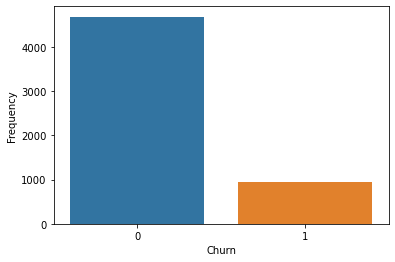

In [105]:
yes=data[data['Churn']==1]["Churn"].count()
no=data[data['Churn']==0]["Churn"].count()
print("Churn:",yes/(yes+no)*100 , "%")
print("Retained:",no/(yes+no)*100 , "%")

cplt =data.groupby(['Churn'])['Churn'].count().reset_index(name='Counts')
sns.barplot(x='Churn', y='Counts',data=cplt)
plt.ylabel("Frequency")
plt.show()

- Customer pada perusahaan ecommerce ini memiliki customer churn yang lebih sedikit <20% dari keseluruhan data.

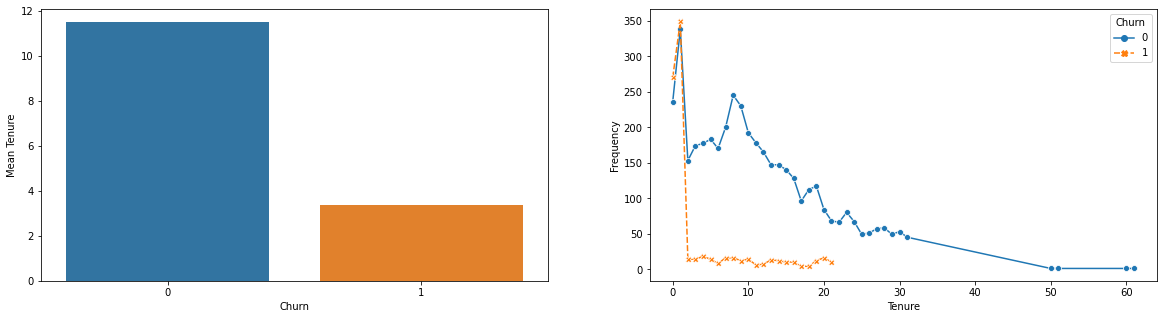

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
odc =data.groupby(['Churn'])['Tenure'].mean().reset_index(name='mean')
sns.barplot(x='Churn', y='mean',data=odc)
plt.ylabel("Mean Tenure")

plt.subplot(122)
odcl =data.groupby(['Tenure', 'Churn'])['OrderCount'].count().reset_index(name='Counts')
sns.lineplot(x='Tenure', y='Counts', hue="Churn",data=odcl, style="Churn",markers=True)
plt.ylabel("Frequency")

plt.show()

- Customer yang memiliki masa tenure lebih rendah memiliki jumlah churn yang lebih banyak.
- Mean Tenure dari customer churn jauh lebih rendah daripda yang tidak churn.
- Tenure adalah feature yang paling mempengaruhi prediksi dari customer churn.

## 2. Feature Importance

In [107]:
f_imp = pipe_rf.steps[1][1].feature_importances_
f_imp


array([0.24301659, 0.06492206, 0.04120595, 0.05095473, 0.06000771,
       0.05362642, 0.04321049, 0.03505148, 0.08344589, 0.09753545,
       0.00980963, 0.01041489, 0.00782551, 0.00635527, 0.01400035,
       0.01137171, 0.00976815, 0.00472708, 0.01378062, 0.0124876 ,
       0.00915998, 0.00372535, 0.02510009, 0.01016762, 0.01136331,
       0.00383341, 0.00761494, 0.01253355, 0.04298418])

1,10,2,5,4 = ('Tenure','CashbackAmount','WarehouseToHome', 'NumberOfAddress', 'NumberOfDeviceRegistered')

In [108]:
pipe_rf.steps[0][1]

ColumnTransformer(transformers=[('minmaxScaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('OHE', OneHotEncoder(),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'PreferedOrderCat', 'MaritalStatus'])])

Berdasarkan hasil feature importance pada hasil terbaik XGBoost, dapat ditentukan fitur yang memiliki pengaruh tinggi pada model antara lain :
1. 'Tenure'
2. 'CashbackAmount'
3. 'WarehouseToHome' 
4. 'NumberOfAddress'
5. 'NumberOfDeviceRegistered'

sehingga beberapa fitur diatas adalah faktor yang harus dipertimbangkan dalam mengatur strategi marketing untuk menghindari Customer Churn.

## 3. Pemilihan model terbaik

1. **RF Default**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.8885
2. **RF after hyperparameter tuning**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.8857
3. **DT Default**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.894
4. **DT after hyperparameter tuning**
    - roc-auc-score train = 0.928
    - roc-auc-score test = 0.786
5. **XGBoost Default**
    - roc-auc-score train = 0.926
    - roc-auc-score test = 0.783
6. **XGBoost after hyperparameter tuning**
    - roc-auc-score train = 1
    - roc-auc-score test = 0.939

**Sehingga dari score roc-auc diatas, dapat diambil kesimpulan bahwa model terbaik dengan score roc-auc-score pada dataset test tertinggi adalah XGBoost setelah dilakukan tuning hyperparameter dengan parameter {'xg__criterion': 'friedman_mse', 'xg__learning_rate': 1.0, 'xg__n_estimators': 1000}, dan model ini siap dideploy untuk diaplikasikan**